In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')

In [54]:
# Read the CSV file
df = pd.read_csv('Position_Salaries.csv')
print(df)

# Extract features (X) and target variable (y)
X_level = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

# Check for and handle categorical variables
label_encoder = LabelEncoder() # Converts categorical variables (object type) into numerical values, making them suitable for machine learning models
x_categorical = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = df.select_dtypes(exclude=['object']).values
X = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values

# Initialize and fit the RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
# RandomForestRegressor: It builds multiple decision trees and combines their predictions.
# n_estimators=10: Defines the number of decision trees in the Random Forest (10 trees in this case).
# random_state=0: Ensures the randomness in model training is controlled for reproducibility.
# oob_score=True: Enables out-of-bag scoring which evaluates the model’s performance using data not seen by individual trees during training.

regressor.fit(X, y) # Trains the Random Forest model using the combined dataset (X) and target variable (y)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [56]:
# Evaluation of the trained Random Forest Regression model:

oob_score = regressor.oob_score_
# out-of-bag (OOB) score estimates the model’s generalization performance
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(X)
# makes predictions using the trained model and stores them in the ‘predictions’ array

mse = mean_squared_error(y, predictions)
# Calculates the difference between true and predicted values (MSE)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
# Measures how well the model fits the data (R-squared value)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.644879832593859
Mean Squared Error: 2647325000.0
R-squared: 0.9671801245316117


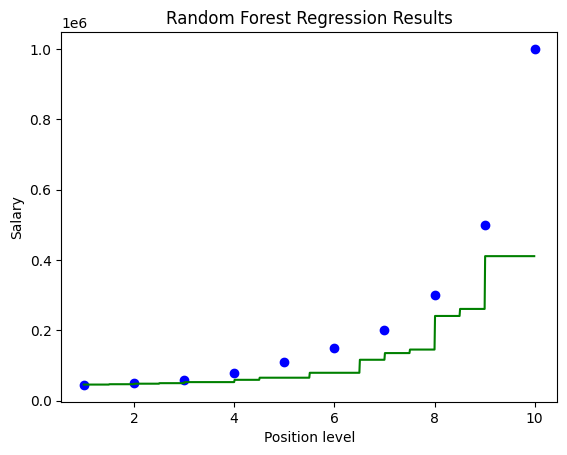

In [58]:
X_grid = np.arange(min(X_level),max(X_level),0.01)
X_grid = X_grid.reshape(len(X_grid),1) 
  
# Create a grid for combined features
X_grid_combined = np.hstack((X_grid, np.zeros((len(X_grid), X.shape[1] - 1))))

plt.scatter(X_level,y, color='blue') #plotting real points
plt.plot(X_grid, regressor.predict(X_grid_combined),color='green') #plotting for predict points
  
plt.title("Random Forest Regression Results")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000
Out-of-Bag Score: 0.644879832593859
Mean Squared Error: 2647325000.0
R-squared: 0.9671801245316117


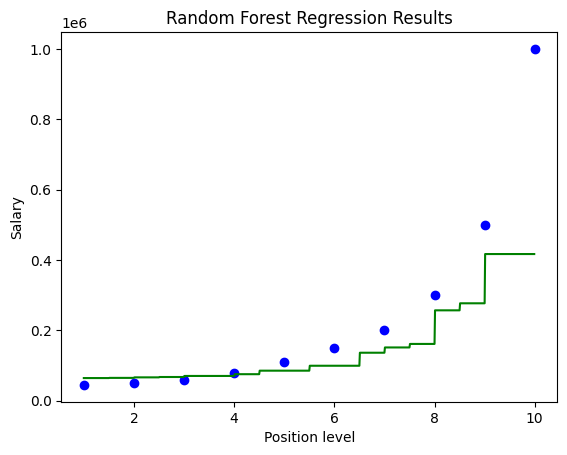

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Read the CSV file
df = pd.read_csv('Position_Salaries.csv')
print(df)

# Extract features (X) and target variable (y)
X_level = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

# Check for and handle categorical variables
label_encoder = LabelEncoder()
x_categorical = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = df.select_dtypes(exclude=['object']).values
X = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values

# Initialize and fit the RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
regressor.fit(X, y) # Trains the Random Forest model using the combined dataset (X) and target variable (y)

# Evaluation of the trained Random Forest Regression model:
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(X)
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

# Plotting the results
X_grid = np.arange(min(X_level), max(X_level), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)

# Use the mean for numerical features and the mode for categorical features
mean_numerical = np.mean(x_numerical, axis=0)
mode_categorical = x_categorical.mode().iloc[0]

# Create a grid for combined features
X_grid_combined = np.hstack((X_grid, np.tile(mean_numerical, (len(X_grid), 1)), np.tile(mode_categorical, (len(X_grid), 1))))

# Ensure X_grid_combined has the same number of features as X
X_grid_combined = X_grid_combined[:, :X.shape[1]]

plt.scatter(X_level, y, color='blue') # plotting real points
plt.plot(X_grid, regressor.predict(X_grid_combined), color='green') # plotting predicted points

plt.title("Random Forest Regression Results")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

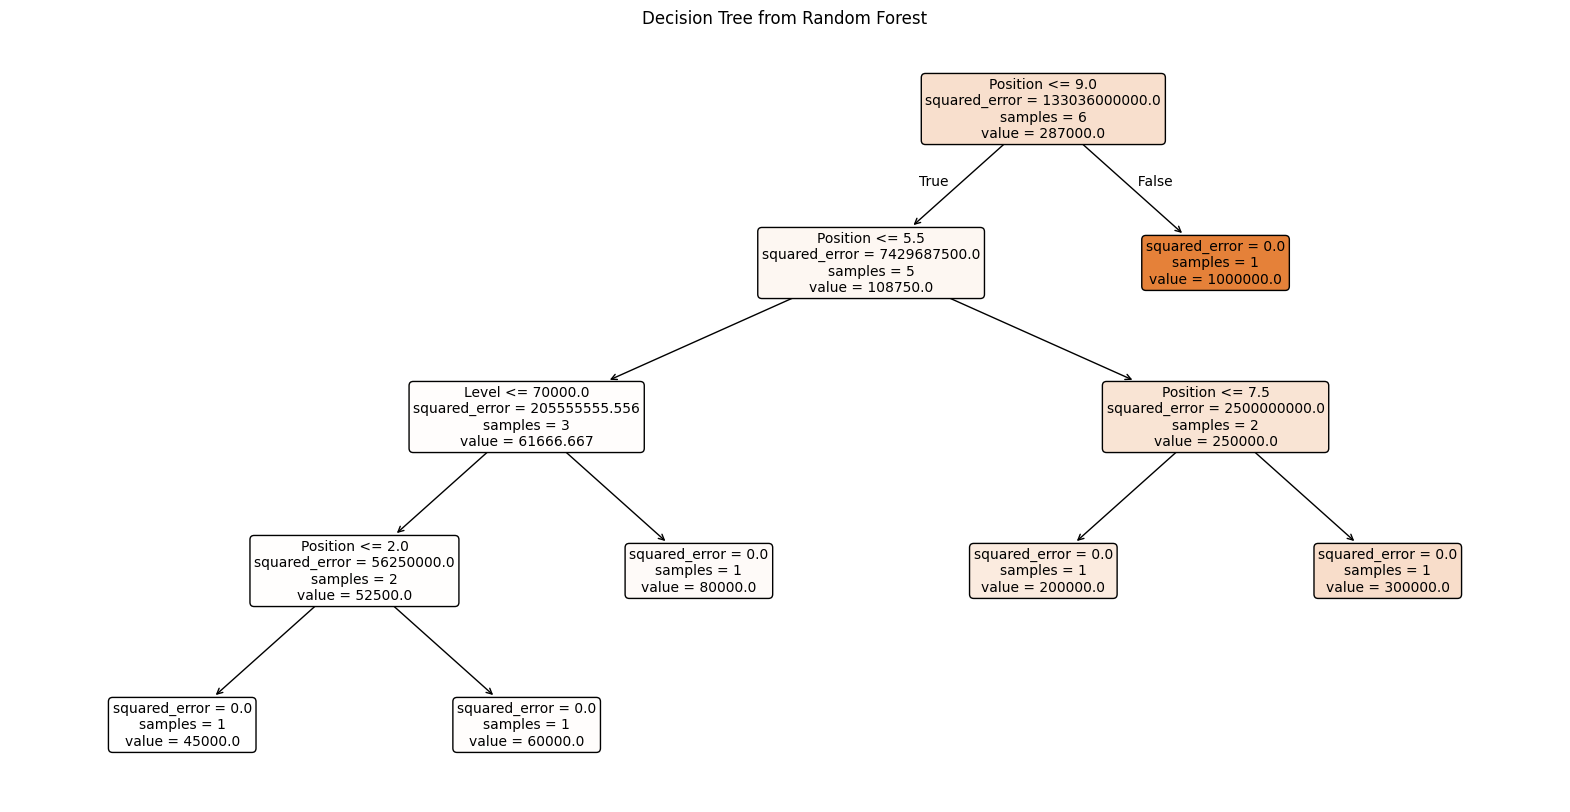

In [63]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()
